In [83]:
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

def generate_graph(N, x_star, a, b):
  graph = np.zeros((N, N))
  for i in range(N):
    for j in range(i+1, N):
      if x_star[i]*x_star[j] == 1:
        if np.random.uniform(0,N) < a:
          graph[i][j] = 1
          graph[j][i] = 1
      elif x_star[i]*x_star[j] == -1:
        if np.random.uniform(0,N) < b:
          graph[i][j] = 1
          graph[j][i] = 1
  return graph

def probability(x, graph, a, b, N):
  p = 1
  ln1 = np.log(a/b)
  ln2 = np.log((1 - a/N)/(1 - b/N))
  for i in range(N):
    for j in range(i+1, N):
      h = 1/2*(graph[i, j]*ln1 + (1 - graph[i, j])*ln2)
      p *= np.exp(h * x[i] * x[j])
  return p

def acceptance_prob(x_1, x_2, graph, a, b, N, psi_1, psi_2):
  p1 = probability(x_1, graph, a, b, N)
  p2 = probability(x_2, graph, a, b, N)
  return np.min([1, (p2*psi_2)/(p1*psi_1)])

def hamiltonian(x, graph, a, b, N):
  p = 0
  ln1 = np.log(a/b)
  ln2 = np.log((1 - a/N)/(1 - b/N))
  for i in range(N):
    for j in range(i+1, N):
      h = 1/2*(graph[i, j]*ln1 + (1 - graph[i, j])*ln2)
      p -= h * x[i] * x[j]
  return p

def overlap(x_star, x_final, N):
  over = 0
  for i in range(N):
    over += x_star[i]*x_final[i]
  return (1/N)*np.abs(over)

def plot(ham, over):
  _, axes = plt.subplots(nrows=1, ncols=2, figsize=(32,8))
  axes[0].set_ylabel('Hamiltonian', fontsize=20)
  axes[0].set_xlabel('iter', fontsize=20)
  axes[1].set_ylabel('Overlap', fontsize=20)
  axes[1].set_xlabel('iter', fontsize=20)
  axes[0].plot(ham)
  axes[1].plot(over)
  axes[0].grid()
  axes[1].grid()
  plt.show()

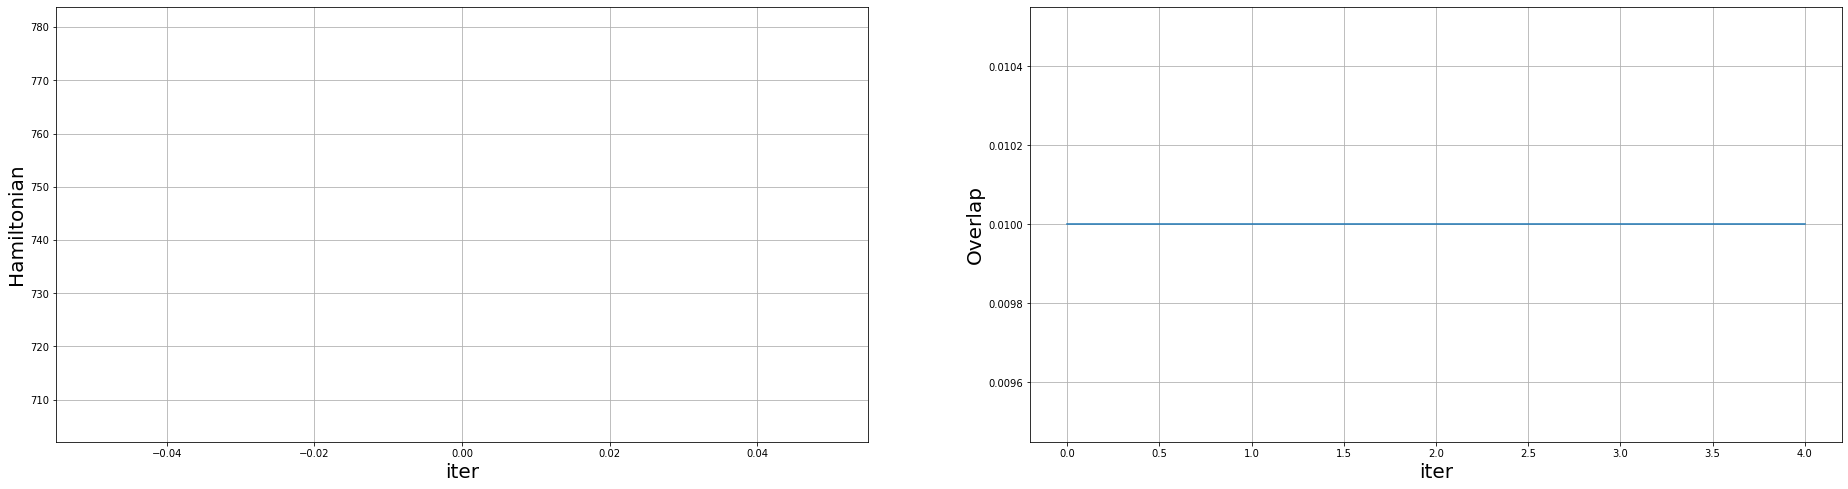

KeyboardInterrupt: ignored

In [86]:
N = 1000
x_star = np.random.choice([-1, 1], N)
psi_1 = 1/N
psi_2 = 1/N
a = 300
b = 50
num_iter = 10000

x_star = np.random.choice([-1, 1], N)
graph = generate_graph(N, x_star, a, b)

hams = []
overlaps = []
curr_state = np.random.choice([-1, 1], N)
for i in range(num_iter):
  rand_ind = np.random.choice(N, 1)[0]
  next_state = curr_state.copy()
  next_state[rand_ind] *= -1
  a = acceptance_prob(curr_state, next_state, graph, a, b, N, psi_1, psi_2)
  rand_num = np.random.uniform(0,1)
  if rand_num <= a:
    curr_state = next_state.copy()
  if i % 10 == 0:
    hams.append(hamiltonian(curr_state, graph, a, b, N))
    overlaps.append(overlap(x_star, curr_state, N))
    clear_output(wait=True)
    plot(hams, overlaps)

print('x_star', x_star)
print('final_state', curr_state)
print('overlap', overlap(x_star, curr_state, N))